In [24]:
#Analysis of Stroke Dataset and Building Logistic Regression and K Means Clustering Models

#By Ameya Rajesh Kelaskar



import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,explained_variance_score,confusion_matrix,accuracy_score,classification_report
from math import sqrt
from sklearn.cluster import KMeans, k_means
%matplotlib inline



#Import dataset
df = pd.read_csv('/Users/ameyakelaskar/Downloads/healthcare-dataset-stroke-data.csv')

print(df)

print(df.shape)

print(df.info())

print(df.head())

#Datatypes which are 'object' can be converted into categorical for now, later we will change them to numerical during feature selection
#Nulls in bmi column need to be imputed 

#We can drop id column as it is of no apparent use

df=df.drop('id',axis=1)

df

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [25]:
#Replace nulls in bmi

df['bmi'].fillna((df['bmi'].mean()), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [26]:
#Convert object datatypes to categorical

for i in ['gender','ever_married','work_type','Residence_type','smoking_status']:
     df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   category
 1   age                5110 non-null   float64 
 2   hypertension       5110 non-null   int64   
 3   heart_disease      5110 non-null   int64   
 4   ever_married       5110 non-null   category
 5   work_type          5110 non-null   category
 6   Residence_type     5110 non-null   category
 7   avg_glucose_level  5110 non-null   float64 
 8   bmi                5110 non-null   float64 
 9   smoking_status     5110 non-null   category
 10  stroke             5110 non-null   int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 265.4 KB


In [27]:
#Investigate all elements within each feature

for column in df:
    unique_values=np.unique(df[column])
    nr_values=len(unique_values)
    if nr_values<10:
            print("The number of values for feature {} is: {} --{} ".format(column,nr_values,unique_values))
    else:
        print("The number of values for feature {} is {}".format(column,nr_values))
        
#From here we get an idea that average glucose level and bmi might not be important features

The number of values for feature gender is: 3 --['Female' 'Male' 'Other'] 
The number of values for feature age is 104
The number of values for feature hypertension is: 2 --[0 1] 
The number of values for feature heart_disease is: 2 --[0 1] 
The number of values for feature ever_married is: 2 --['No' 'Yes'] 
The number of values for feature work_type is: 5 --['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children'] 
The number of values for feature Residence_type is: 2 --['Rural' 'Urban'] 
The number of values for feature avg_glucose_level is 3979
The number of values for feature bmi is 419
The number of values for feature smoking_status is: 4 --['Unknown' 'formerly smoked' 'never smoked' 'smokes'] 
The number of values for feature stroke is: 2 --[0 1] 


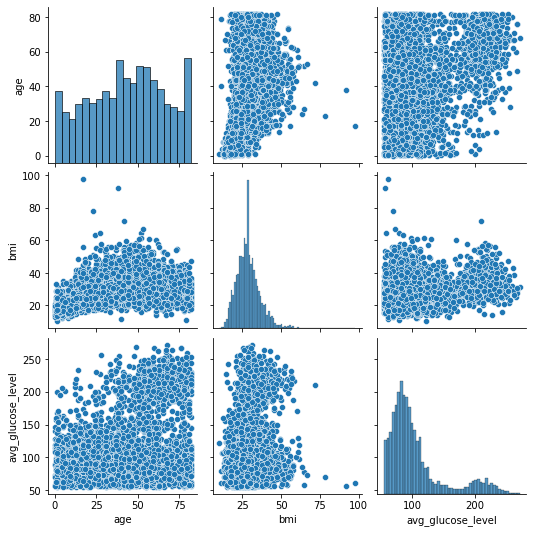

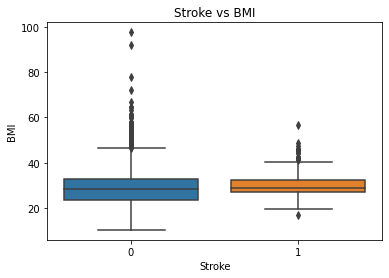

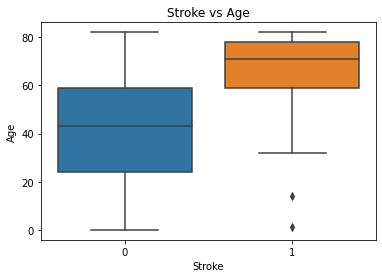

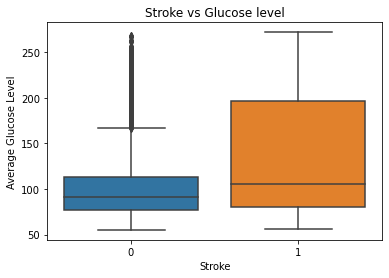

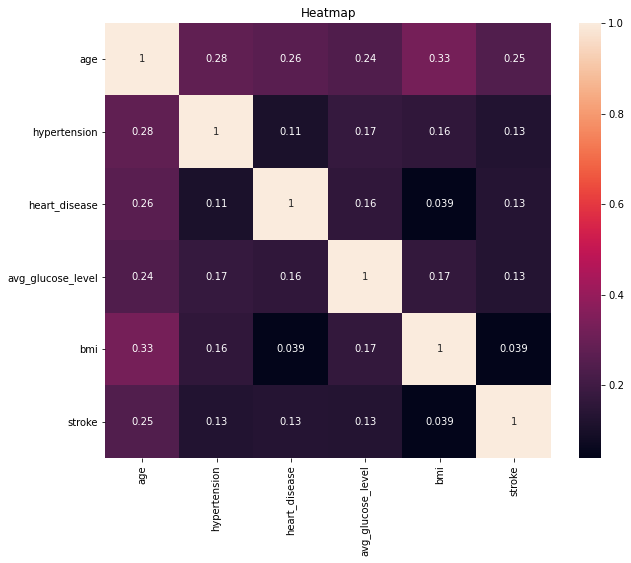

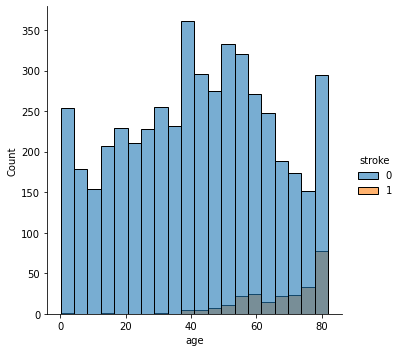

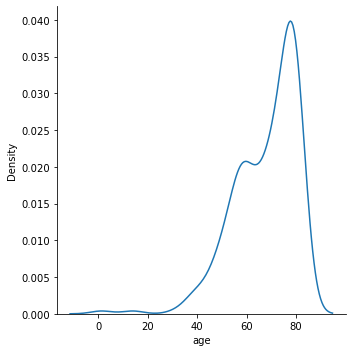

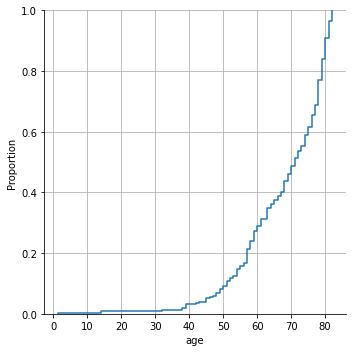

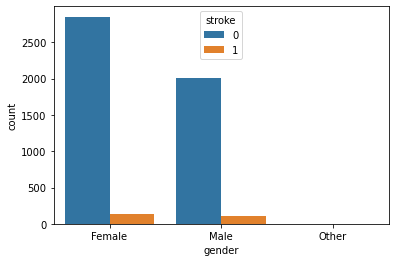

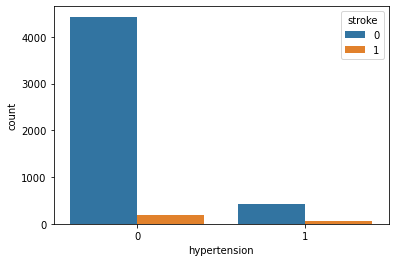

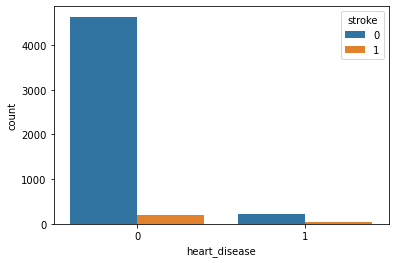

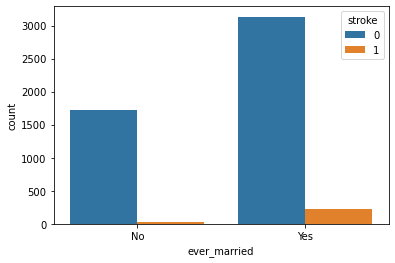

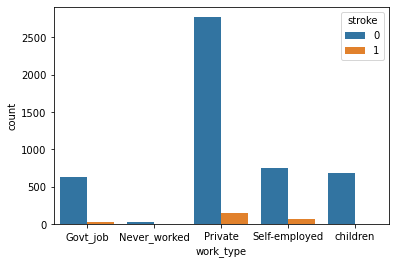

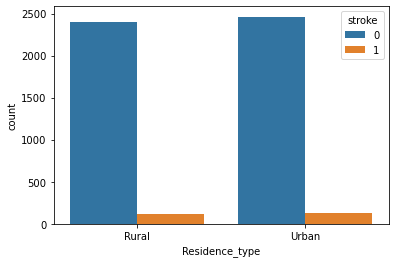

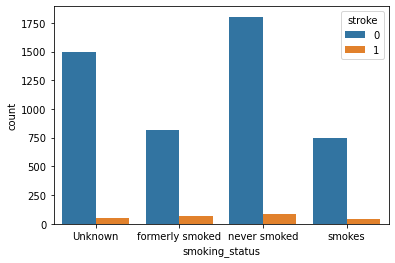

In [28]:

#Seaborn pairplots

g = sns.pairplot(df[['age','bmi','avg_glucose_level']])
plt.show()
#Boxplots
sns.boxplot(data=df,x='stroke',y='bmi',)
plt.title('Stroke vs BMI')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

#The prople who had stroke seem to have a higher BMI

sns.boxplot(data=df,x='stroke',y='age')
plt.title('Stroke vs Age')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()
#The prople who had stroke seem to be much older than those who did not

sns.boxplot(data=df,x='stroke',y='avg_glucose_level')
plt.title('Stroke vs Glucose level')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,ax=ax)
plt.title('Heatmap')


sns.displot(x='age', hue='stroke', data=df, alpha=0.6)
plt.show()

stroke = df[df['stroke']==1]
sns.displot(stroke.age, kind='kde')
plt.show()

sns.displot(stroke.age, kind='ecdf')
plt.grid(True)
plt.show()


#Age is clearly linked with stroke

features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']

for f in features:
 sns.countplot(x=f,data=df,hue='stroke')
 plt.show()

In [29]:
#Find outliers based on bmi column using percentile

min_thresh,max_thresh=df.bmi.quantile([0.001,0.999]) #Calcuated threshold values using percentile

print('The minimum threshold is '+str(min_thresh)) #Prints the value of minimum threshold
print('The max threshold is '+str(max_thresh)) #Prints the value of maximum threshold

#New DF with ouliers removed

df2=df[(df.bmi>min_thresh) & (df.bmi<max_thresh)] #Creates a new dataframe with the outliers removed based on bmi column

print('The dataframe with outliers removed is: \n'+ str(df2)) #Prints the new dataframe with outliers removed

##impute outliers using median 

median = df2['bmi'].median()  #median of bmi column of new dataframe without outliers

df.loc[df.bmi < min_thresh, 'bmi'] = np.nan #Replace outliers in original dataframe with nan values
df.loc[df.bmi > max_thresh, 'bmi'] = np.nan #Replace outliers in original dataframe with nan values

df.bmi.fillna(median,inplace=True) #Fill the nan values with the median

#Original dataframe with outliers imputed with median

print('Original dataframe with outliers imputed with median is: \n'+str(df))

The minimum threshold is 12.821800000000001
The max threshold is 64.75640000000021
The dataframe with outliers removed is: 
      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  F

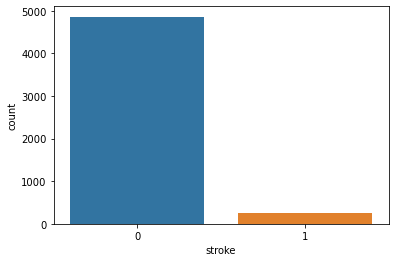

In [30]:
##Investigate distribution of 'stroke'

sns.countplot(x='stroke',data=df)
plt.show()

#We can clearly see that the stroke variable is imbalanced 
#This will create problems in model formation
#Therefore, we will use oversampling to balance the dependent variable

In [31]:
count_class_0,count_class_1=df.stroke.value_counts()

df_class_0=df[df['stroke']==0]
df_class_1=df[df['stroke']==1]

0    4861
1    4861
Name: stroke, dtype: int64


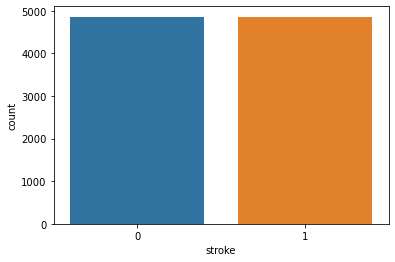

In [32]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True)

df_over=pd.concat((df_class_0,df_class_1_over),axis=0)

print(df_over.stroke.value_counts())

df_over #over sampled dataframe

sns.countplot(x='stroke',data=df_over)
plt.show()

#As we can see, the stroke variable has been balanced

In [33]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

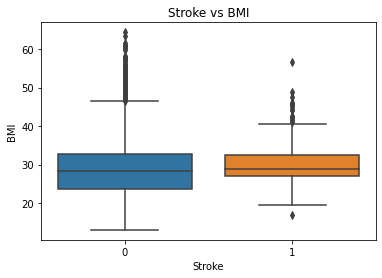

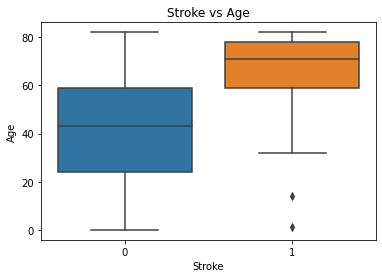

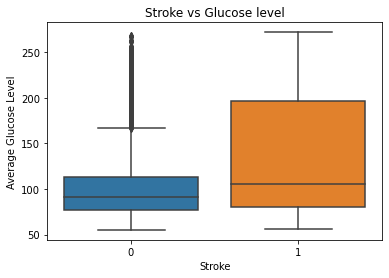

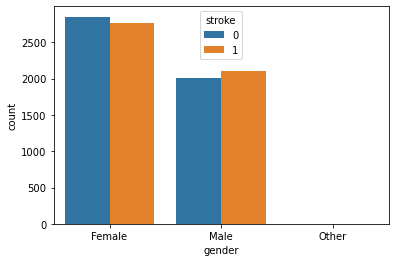

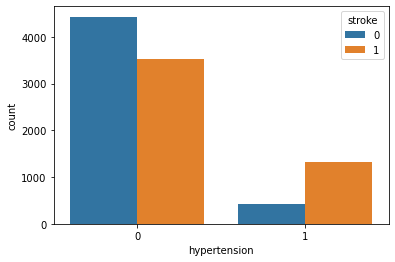

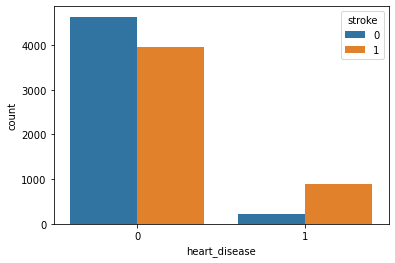

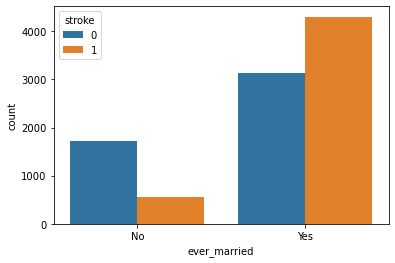

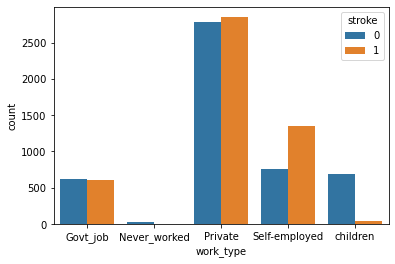

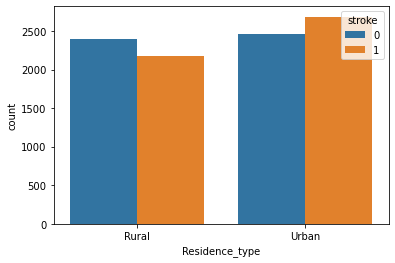

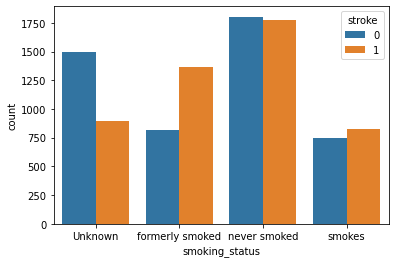

In [34]:

#Visualize data after balancing to find patterns

sns.boxplot(data=df,x='stroke',y='bmi',)
plt.title('Stroke vs BMI')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

#The prople who had stroke seem to have a higher BMI

sns.boxplot(data=df,x='stroke',y='age')
plt.title('Stroke vs Age')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()
#The prople who had stroke seem to be much older than those who did not

sns.boxplot(data=df,x='stroke',y='avg_glucose_level')
plt.title('Stroke vs Glucose level')
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.show()


#Looping through all features by stroke variable and Visualize to check for relationships


features = ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']

for f in features:
 sns.countplot(x=f,data=df_over,hue='stroke')
 plt.show()
    
#More females have had strokes than males, however more percentage of males have had stroke

#Hypertension and heart disease seem to be correlated with stroke

#Married people are much more likely to have had a stroke

#Private and self employed categories have a higher rate of stroke

#Urban population has a slightly higher stroke rate

#Smoking habits are correlated to stroke

In [35]:
#Convert categorical variables into numeric

new_df_over = pd.get_dummies(df_over,columns=features)
new_df_over

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
249,3.0,95.12,18.000000,0,0,1,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
250,58.0,87.96,39.200000,0,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
251,8.0,110.89,17.600000,0,1,0,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0
252,70.0,69.04,35.900000,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
253,14.0,161.28,19.100000,0,0,1,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,51.0,103.43,27.300000,1,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
200,74.0,167.13,28.893237,1,0,1,0,1,0,1,...,0,1,0,0,0,1,1,0,0,0
233,77.0,199.84,28.000000,1,1,0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
215,79.0,205.33,31.000000,1,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [36]:
#Feature selection

X=new_df_over.drop('stroke',axis=1).values
y=new_df_over['stroke']

print(X.shape)
print(y.shape)

(9722, 23)
(9722,)


In [37]:
#Run a tree-based estimator

dt= DecisionTreeClassifier(random_state=15,criterion='entropy',max_depth=10)
dt.fit(X,y)



DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [38]:
#Running feature importance

fi_col=[]
fi=[]
for i,column in enumerate(new_df_over.drop('stroke',axis=1)):
    print("The feature importance for {} is: {}".format(column,dt.feature_importances_[i]))
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for age is: 0.49004846795530366
The feature importance for avg_glucose_level is: 0.23684124638984463
The feature importance for bmi is: 0.17542737266730718
The feature importance for gender_Female is: 0.0033793887511042284
The feature importance for gender_Male is: 0.0066438256842465595
The feature importance for gender_Other is: 0.0
The feature importance for hypertension_0 is: 0.006825224506097155
The feature importance for hypertension_1 is: 0.006049551604534145
The feature importance for heart_disease_0 is: 0.005011893205382829
The feature importance for heart_disease_1 is: 0.0
The feature importance for ever_married_No is: 0.0026474918057250016
The feature importance for ever_married_Yes is: 0.0
The feature importance for work_type_Govt_job is: 0.0044789426467725605
The feature importance for work_type_Never_worked is: 0.0
The feature importance for work_type_Private is: 0.00819599674784913
The feature importance for work_type_Self-employed is: 0.00616074790

In [39]:
fi_df=zip(fi_col,fi)
fi_df=pd.DataFrame(fi_df,columns=['Feature','Feature Importance'])
print(fi_df)

#Ordering the data

fi_df=fi_df.sort_values('Feature Importance',ascending=False).reset_index()
print(fi_df)
#Create columns to keep

columns_to_keep=fi_df['Feature'][0:19]

columns_to_keep

                           Feature  Feature Importance
0                              age            0.490048
1                avg_glucose_level            0.236841
2                              bmi            0.175427
3                    gender_Female            0.003379
4                      gender_Male            0.006644
5                     gender_Other            0.000000
6                   hypertension_0            0.006825
7                   hypertension_1            0.006050
8                  heart_disease_0            0.005012
9                  heart_disease_1            0.000000
10                 ever_married_No            0.002647
11                ever_married_Yes            0.000000
12              work_type_Govt_job            0.004479
13          work_type_Never_worked            0.000000
14               work_type_Private            0.008196
15         work_type_Self-employed            0.006161
16              work_type_children            0.003785
17        

0                                age
1                  avg_glucose_level
2                                bmi
3        smoking_status_never smoked
4             smoking_status_Unknown
5                  work_type_Private
6                     hypertension_0
7                        gender_Male
8            work_type_Self-employed
9                     hypertension_1
10             smoking_status_smokes
11                   heart_disease_0
12                work_type_Govt_job
13                work_type_children
14    smoking_status_formerly smoked
15                     gender_Female
16              Residence_type_Urban
17                   ever_married_No
18              Residence_type_Rural
Name: Feature, dtype: object

In [40]:
#Print shapes

print(new_df_over.shape)
print(new_df_over[columns_to_keep].shape)

(9722, 24)
(9722, 19)


In [41]:
#Split the data into X and y

X = new_df_over[columns_to_keep].values
y = new_df_over['stroke']
y = y.astype(int)

print(X.shape)
print(y.shape)

(9722, 19)
(9722,)


In [42]:
#Hold-out validation

#Train test split, 80%-20%

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=15)

#Hold-out sample, 10%

X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,train_size=0.9,test_size=0.1,random_state=15)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(6999, 19)
(1945, 19)
(778, 19)
(6999,)
(1945,)
(778,)


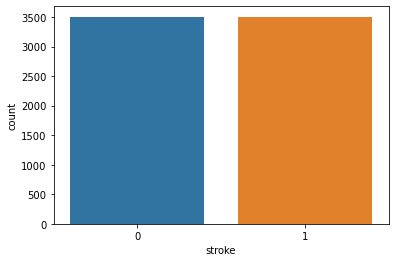

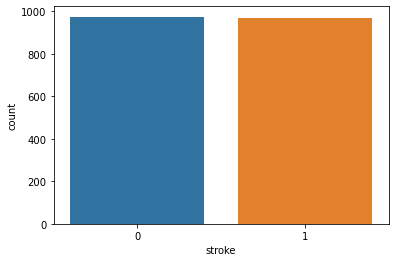

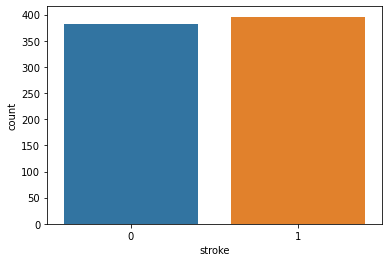

In [43]:
#Investigation of all the y variables to check if there's an imbalance

ax = sns.countplot(x=y_train)
plt.show()

ax = sns.countplot(x=y_test)
plt.show()

ax = sns.countplot(x=y_valid)
plt.show()

In [44]:
#Logistic Regression

#Training the model

lr = LogisticRegression(random_state=10,solver='lbfgs',max_iter=10000)
lr.fit(X_train,y_train)


LogisticRegression(max_iter=10000, random_state=10)

In [45]:
#Predict Class labels for samples in X

y_pred = lr.predict(X_train)
print(y_pred)

[1 0 0 ... 1 1 1]


In [46]:
#Evaluating the model

#Accuracy on training data

print("The Training Accuracy is: ", lr.score(X_train, y_train))

print("The test Accuracy is: ", lr.score(X_test, y_test))

print(classification_report(y_train,y_pred))

#The metrics indicate that the model is good

The Training Accuracy is:  0.7789684240605801
The test Accuracy is:  0.761439588688946
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      3504
           1       0.76      0.82      0.79      3495

    accuracy                           0.78      6999
   macro avg       0.78      0.78      0.78      6999
weighted avg       0.78      0.78      0.78      6999



In [47]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

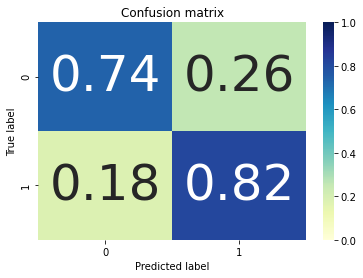

In [48]:
# Visualizing the confusion matrix

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = lr.classes_, title='Confusion matrix')

In [49]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)

FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)



##Total averages :
print("")
print("The average TPR is:", TPR.sum()/2)
print("The average Precision is:", PPV.sum()/2)
print("The average False positive rate is:", FPR.sum()/2)
print("The average False Negative Rate is:", FNR.sum()/2)

The True Positive Rate is: [0.73858447 0.81945637]
The Precision is: [0.80397639 0.75767196]
The False positive rate is: [0.18054363 0.26141553]
The False Negative Rate is:  [0.26141553 0.18054363]

The average TPR is: 0.7790204205616634
The average Precision is: 0.7808241739276223
The average False positive rate is: 0.22097957943833657
The average False Negative Rate is: 0.22097957943833657


In [50]:
#We will use a dummy classifer to check if our model performs better than it
# Training a Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)


print("Testing Acc:", score)

#As per the accuracy score, the model performs better than the dummy classifier


Testing Acc: 0.5012853470437018


In [51]:
#Testing the model on a hold-out sample
#Earlier, we had kept 10% of the data as a hold-out sample
#Now we will test the model performanec on the hold-out sample

lr = LogisticRegression(random_state=10, solver = 'lbfgs',max_iter=10000)
lr.fit(X_train, y_train)
score = lr.score(X_valid, y_valid)


print("Testing Acc:", score)

#The model has good accuracy even on hold-out data

Testing Acc: 0.7763496143958869


In [52]:
#K-Means

X_train = new_df_over.values

#Finding the ideal number of Ks

no_of_clusters = range(2,20)
inertia=[]

for f in no_of_clusters:
    kmeans=KMeans(n_clusters=f,random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for",f,"Clusters is: ",u)

The inertia for 2 Clusters is:  9470054.32432872
The inertia for 3 Clusters is:  6549401.887758198
The inertia for 4 Clusters is:  4976349.551969594
The inertia for 5 Clusters is:  4135990.026382755
The inertia for 6 Clusters is:  3493418.81137885
The inertia for 7 Clusters is:  3029288.9014979317
The inertia for 8 Clusters is:  2688316.6889320714
The inertia for 9 Clusters is:  2440224.7748735077
The inertia for 10 Clusters is:  2243173.7911990783
The inertia for 11 Clusters is:  2069129.3133409515
The inertia for 12 Clusters is:  1938753.351945298
The inertia for 13 Clusters is:  1817789.1533937645
The inertia for 14 Clusters is:  1720166.2966856502
The inertia for 15 Clusters is:  1603148.1139535997
The inertia for 16 Clusters is:  1518844.919310219
The inertia for 17 Clusters is:  1441554.8165339078
The inertia for 18 Clusters is:  1382673.7028561071
The inertia for 19 Clusters is:  1337788.4999354065


Text(0.5, 1.0, 'Inertia per K')

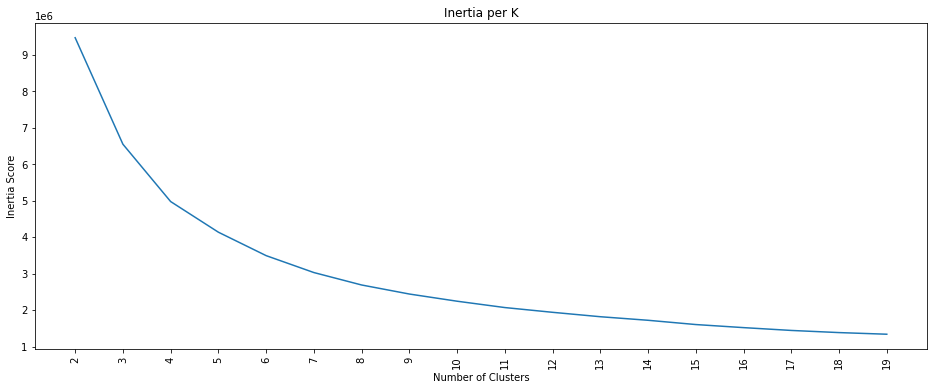

In [53]:
#Plot inertia to determine ideal K value (Elbow Method)

fig, (ax1) = plt.subplots(1,figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx,inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters,rotation='vertical')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia per K')

#From the plot, we see that K=5 can be used for clustering

In [54]:
#Running K-Means on 5 clusters

kmeans=KMeans(n_clusters=5,random_state=2)
kmeans = kmeans.fit(X_train)

#Predictions for new data

predictions= kmeans.predict(X_train)

#Calculating cluster counts

unique, counts = np.unique(predictions, return_counts=True)
counts=counts.reshape(1,5)

#Creating a dataframe

countscldf = pd.DataFrame(counts,columns=['Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5'])

countscldf

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,1082,3045,1952,1347,2296


In [55]:
#K-Means

#I will use two features so that I can visualize the clusters

#Age and BMI

X = new_df_over[['age','bmi']].copy()

#Finding the ideal number of Ks

no_of_clusters = range(2,20)
inertia=[]

for f in no_of_clusters:
    kmeans=KMeans(n_clusters=f,random_state=2)
    kmeans = kmeans.fit(X)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for",f,"Clusters is: ",u)


The inertia for 2 Clusters is:  1779128.6305691884
The inertia for 3 Clusters is:  948893.0043703484
The inertia for 4 Clusters is:  673777.7958715282
The inertia for 5 Clusters is:  565277.7922537194
The inertia for 6 Clusters is:  472192.0098962374
The inertia for 7 Clusters is:  405225.4908958351
The inertia for 8 Clusters is:  349215.25307354704
The inertia for 9 Clusters is:  307864.5901863905
The inertia for 10 Clusters is:  282177.0247789433
The inertia for 11 Clusters is:  253770.5847324939
The inertia for 12 Clusters is:  231430.50876796557
The inertia for 13 Clusters is:  212009.32274960872
The inertia for 14 Clusters is:  199007.0909773848
The inertia for 15 Clusters is:  188297.76627210152
The inertia for 16 Clusters is:  177306.48491683634
The inertia for 17 Clusters is:  169514.0799703459
The inertia for 18 Clusters is:  159119.90697425557
The inertia for 19 Clusters is:  150393.7703053657


Text(0.5, 1.0, 'Inertia per K')

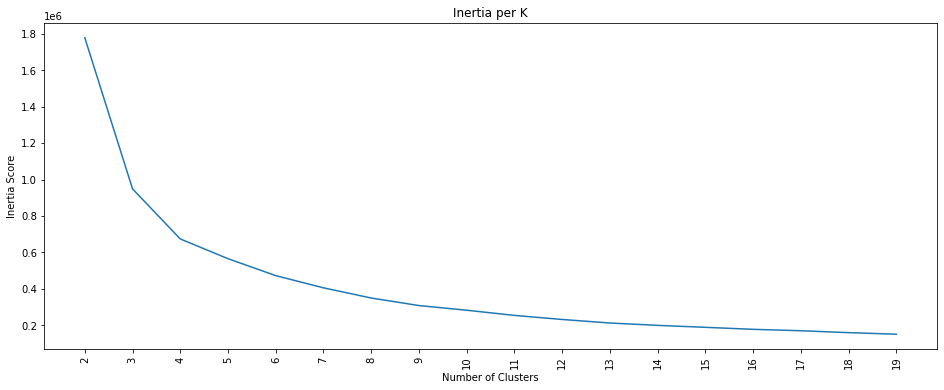

In [56]:
#Plot inertia to determine ideal K value (Elbow Method)

fig, (ax1) = plt.subplots(1,figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx,inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters,rotation='vertical')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia per K')

#From the plot, we see that K=5 can be used for clustering

In [57]:
#Running K-Means on 4 clusters

kmeans=KMeans(n_clusters=4,random_state=2)
kmeans = kmeans.fit(X)

#Predictions for new data

predictions= kmeans.predict(X)

#Calculating cluster counts

unique, counts = np.unique(predictions, return_counts=True)
counts=counts.reshape(1,4)

#Creating a dataframe

countscldf = pd.DataFrame(counts,columns=['Cluster 1','Cluster 2','Cluster 3','Cluster 4'])

countscldf

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,3013,1307,3651,1751


      age        bmi  Clusters
249   3.0  18.000000         1
250  58.0  39.200000         0
251   8.0  17.600000         1
252  70.0  35.900000         2
253  14.0  19.100000         1
..    ...        ...       ...
211  51.0  27.300000         0
200  74.0  28.893237         2
233  77.0  28.000000         2
215  79.0  31.000000         2
112  76.0  28.893237         2

[9722 rows x 3 columns]


Text(0, 0.5, 'BMI')

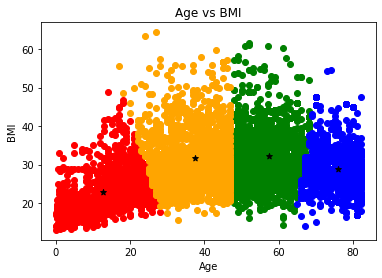

In [58]:
#Visualizing all the clusters 

X['Clusters']=predictions

print(X)

X1=X[X.Clusters==0]
X2=X[X.Clusters==1]
X3=X[X.Clusters==2]
X4=X[X.Clusters==3]
plt.scatter(X1.age,X1.bmi,color='green')
plt.scatter(X2.age,X2.bmi,color='red')
plt.scatter(X3.age,X3.bmi,color='blue')
plt.scatter(X4.age,X4.bmi,color='orange')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='*',color='black',label='centroid')
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')

#Thus we see that people in the age range of approx 30-30 have greater chance of having BMI over the average

In [59]:
#K-Means

#I will use two features so that I can visualize the clusters
#Age and average glucose level

X = new_df_over[['age','avg_glucose_level']].copy()

#Finding the ideal number of Ks

no_of_clusters = range(2,20)
inertia=[]

for f in no_of_clusters:
    kmeans=KMeans(n_clusters=f,random_state=2)
    kmeans = kmeans.fit(X)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for",f,"Clusters is: ",u)

The inertia for 2 Clusters is:  9010135.667112742
The inertia for 3 Clusters is:  6098842.705407784
The inertia for 4 Clusters is:  4531979.5352514
The inertia for 5 Clusters is:  3696003.068631864
The inertia for 6 Clusters is:  3044467.730702328
The inertia for 7 Clusters is:  2606160.9026518106
The inertia for 8 Clusters is:  2275575.2646861128
The inertia for 9 Clusters is:  2032142.4164491056
The inertia for 10 Clusters is:  1837070.2951267634
The inertia for 11 Clusters is:  1694440.552354547
The inertia for 12 Clusters is:  1521390.029726477
The inertia for 13 Clusters is:  1397808.80986184
The inertia for 14 Clusters is:  1312616.5661301345
The inertia for 15 Clusters is:  1220166.1028555622
The inertia for 16 Clusters is:  1151340.2726640706
The inertia for 17 Clusters is:  1073684.571743171
The inertia for 18 Clusters is:  993014.1665095354
The inertia for 19 Clusters is:  948280.7465537263


Text(0.5, 1.0, 'Inertia per K')

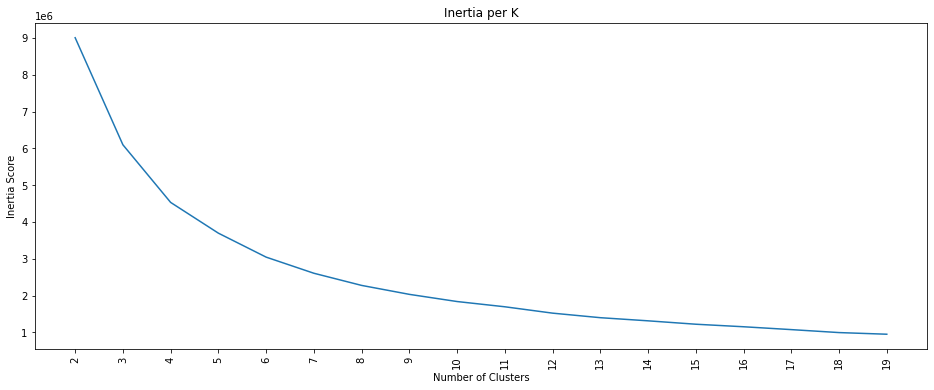

In [60]:
#Plot inertia to determine ideal K value (Elbow Method)

fig, (ax1) = plt.subplots(1,figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx,inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters,rotation='vertical')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia per K')

#From the plot, we see that K=5 can be used for clustering

In [61]:
#Running K-Means on 4 clusters

kmeans=KMeans(n_clusters=4,random_state=2)
kmeans = kmeans.fit(X)

#Predictions for new data

predictions= kmeans.predict(X)

#Calculating cluster counts

unique, counts = np.unique(predictions, return_counts=True)
counts=counts.reshape(1,4)

#Creating a dataframe

countscldf = pd.DataFrame(counts,columns=['Cluster 1','Cluster 2','Cluster 3','Cluster 4'])

countscldf

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,1814,2257,3325,2326


      age  avg_glucose_level  Clusters
249   3.0              95.12         3
250  58.0              87.96         2
251   8.0             110.89         3
252  70.0              69.04         2
253  14.0             161.28         0
..    ...                ...       ...
211  51.0             103.43         0
200  74.0             167.13         1
233  77.0             199.84         1
215  79.0             205.33         1
112  76.0             106.41         0

[9722 rows x 3 columns]


Text(0, 0.5, 'Average Glucose level')

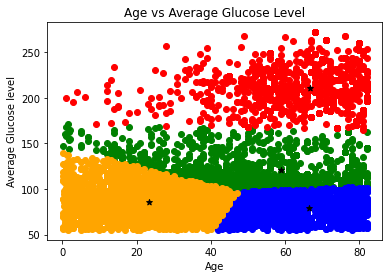

In [62]:
X['Clusters']=predictions

print(X)

X1=X[X.Clusters==0]
X2=X[X.Clusters==1]
X3=X[X.Clusters==2]
X4=X[X.Clusters==3]
plt.scatter(X1.age,X1.avg_glucose_level,color='green')
plt.scatter(X2.age,X2.avg_glucose_level,color='red')
plt.scatter(X3.age,X3.avg_glucose_level,color='blue')
plt.scatter(X4.age,X4.avg_glucose_level,color='orange')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='*',color='black',label='centroid')
plt.title('Age vs Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose level')

#Thus we see that people in the older age range tend to have higher glucose levels than people in the lower age groups

In [63]:
#K-Means

#I will use two features so that I can visualize the clusters
#BMI and average glucose level 

X = new_df_over[['bmi','avg_glucose_level']].copy()

#Finding the ideal number of Ks

no_of_clusters = range(2,20)
inertia=[]

for f in no_of_clusters:
    kmeans=KMeans(n_clusters=f,random_state=2)
    kmeans = kmeans.fit(X)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for",f,"Clusters is: ",u)

The inertia for 2 Clusters is:  4990108.096960298
The inertia for 3 Clusters is:  2869849.671468815
The inertia for 4 Clusters is:  1979403.577789304
The inertia for 5 Clusters is:  1459862.200177804
The inertia for 6 Clusters is:  1156958.6888179015
The inertia for 7 Clusters is:  982505.8174433933
The inertia for 8 Clusters is:  852266.0883032874
The inertia for 9 Clusters is:  741493.838031218
The inertia for 10 Clusters is:  670712.3001706618
The inertia for 11 Clusters is:  620472.648060776
The inertia for 12 Clusters is:  578589.3187212041
The inertia for 13 Clusters is:  536060.6623070881
The inertia for 14 Clusters is:  504785.9145811879
The inertia for 15 Clusters is:  457773.3527930697
The inertia for 16 Clusters is:  431415.99836046173
The inertia for 17 Clusters is:  402508.63130792364
The inertia for 18 Clusters is:  383084.85146179545
The inertia for 19 Clusters is:  359400.8619351125


Text(0.5, 1.0, 'Inertia per K')

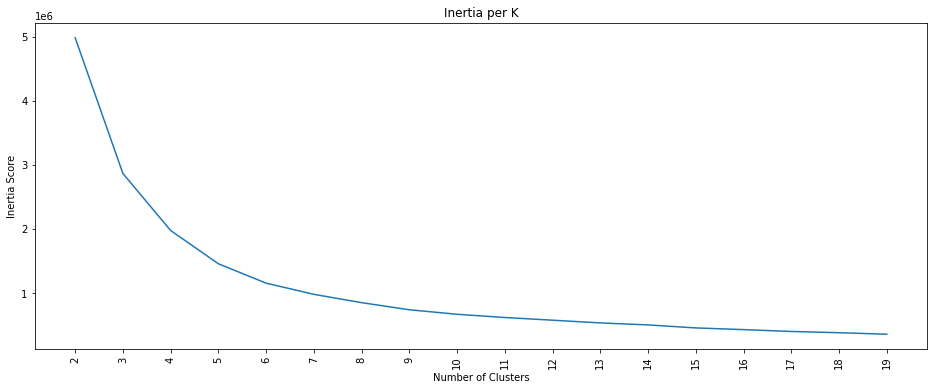

In [64]:
#Plot inertia to determine ideal K value (Elbow Method)

fig, (ax1) = plt.subplots(1,figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx,inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters,rotation='vertical')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia per K')

#From the plot, we see that K=5 can be used for clustering

In [65]:
#Running K-Means on 4 clusters

kmeans=KMeans(n_clusters=4,random_state=2)
kmeans = kmeans.fit(X)

#Predictions for new data

predictions= kmeans.predict(X)

#Calculating cluster counts

unique, counts = np.unique(predictions, return_counts=True)
counts=counts.reshape(1,4)

#Creating a dataframe

countscldf = pd.DataFrame(counts,columns=['Cluster 1','Cluster 2','Cluster 3','Cluster 4'])

countscldf

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,2924,1239,4365,1194


           bmi  avg_glucose_level  Clusters
249  18.000000              95.12         0
250  39.200000              87.96         2
251  17.600000             110.89         0
252  35.900000              69.04         2
253  19.100000             161.28         3
..         ...                ...       ...
211  27.300000             103.43         0
200  28.893237             167.13         3
233  28.000000             199.84         3
215  31.000000             205.33         3
112  28.893237             106.41         0

[9722 rows x 3 columns]


Text(0, 0.5, 'Average Glucose level')

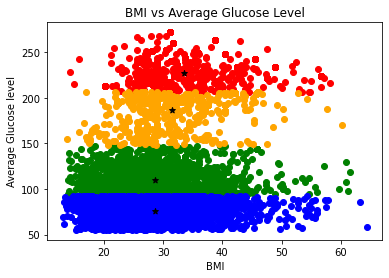

In [66]:
X['Clusters']=predictions

print(X)

X1=X[X.Clusters==0]
X2=X[X.Clusters==1]
X3=X[X.Clusters==2]
X4=X[X.Clusters==3]
plt.scatter(X1.bmi,X1.avg_glucose_level,color='green')
plt.scatter(X2.bmi,X2.avg_glucose_level,color='red')
plt.scatter(X3.bmi,X3.avg_glucose_level,color='blue')
plt.scatter(X4.bmi,X4.avg_glucose_level,color='orange')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='*',color='black',label='centroid')
plt.title('BMI vs Average Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Average Glucose level')

#We see that people with higher BMI also tend to have higher glucose levels